In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


--- First 5 Rows of the Dataset ---
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                    

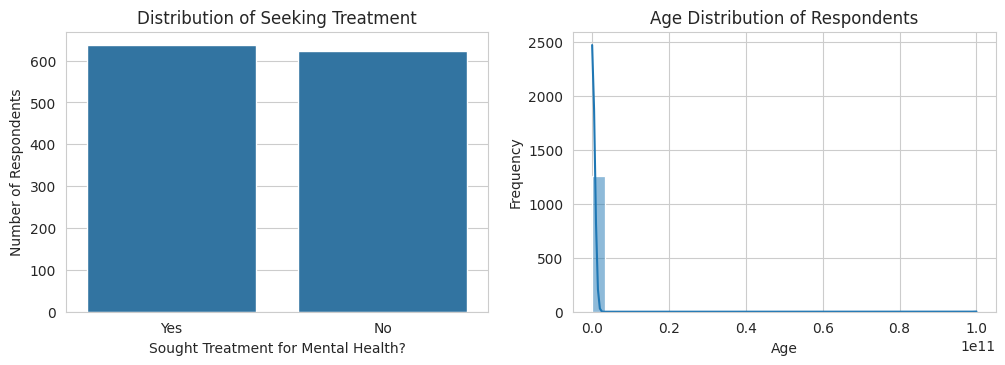

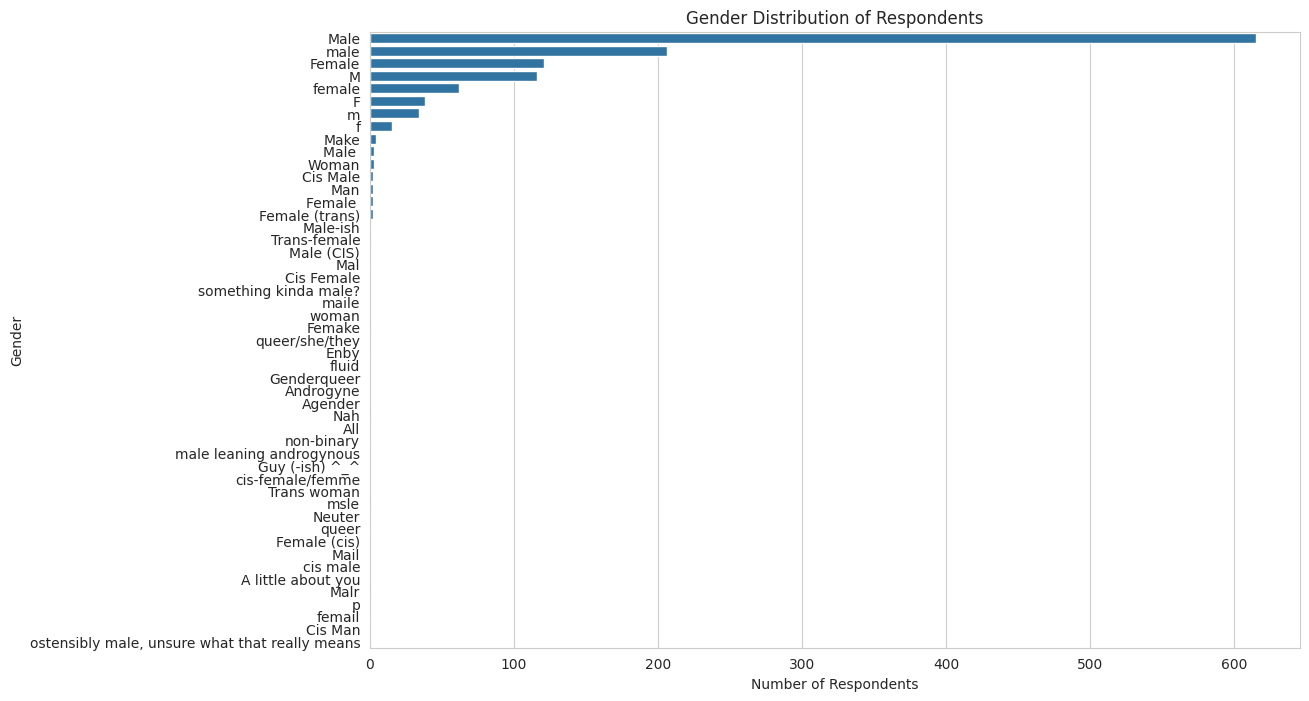

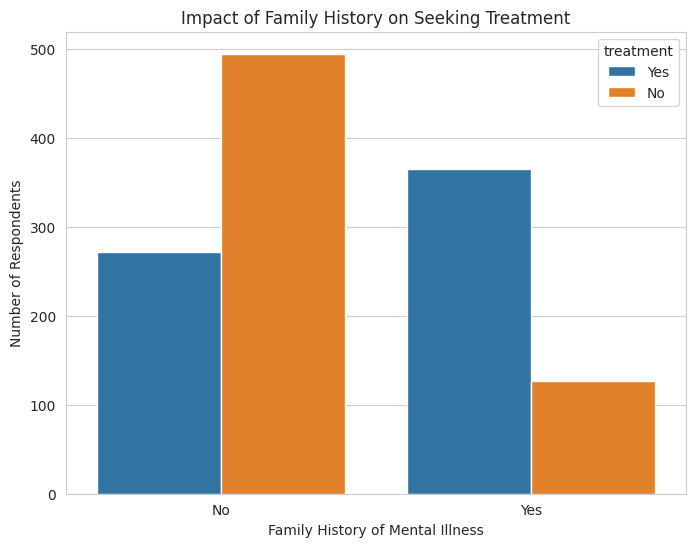

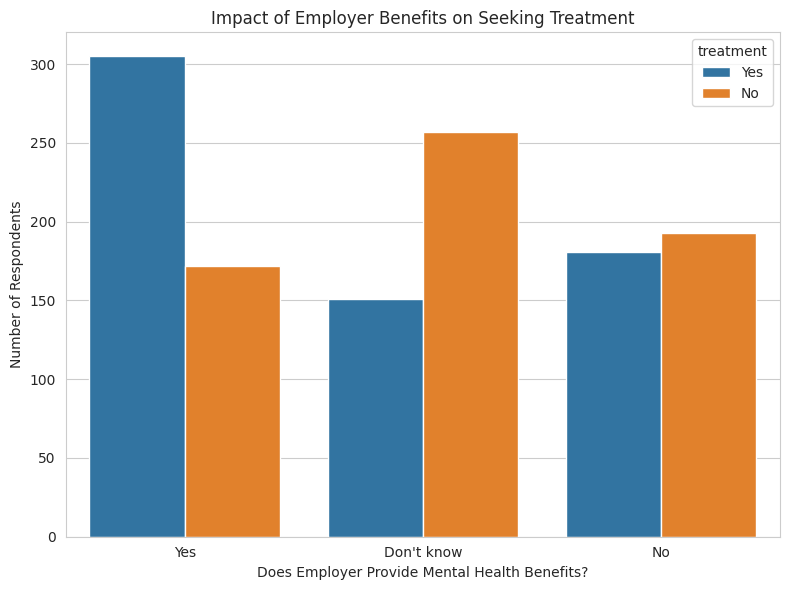

In [ ]:
# --- 1. Loading the Data ---
# Loading the dataset from the CSV file downloaded from Kaggle.

try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/survey.csv')
except FileNotFoundError:
    print("Error: 'survey.csv' not found. Please download the dataset from Kaggle and place it in the correct directory.")
    # Creating a dummy dataframe to prevent further errors in the script
    df = pd.DataFrame()
if not df.empty:
    # --- 2. Initial Data Inspection ---
    print("--- First 5 Rows of the Dataset ---")
    print(df.head())
    print("\n" + "="*50 + "\n")

    print("--- Dataset Information ---")
    # trying to get a concise summary of the dataframe, including data types and non-null values.
    df.info()
    print("\n" + "="*50 + "\n")

    print("--- Descriptive Statistics ---")
    # Trying to get statistical details of the numerical columns.
    print(df.describe())
    print("\n" + "="*50 + "\n")

    print("--- Missing Values ---")
    # Checking for the number of missing values in each column.
    print(df.isnull().sum())
    print("\n" + "="*50 + "\n")

    # --- 3. Exploratory Visualization ---
    # Setting the style for the plots
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 8))

    # a) Distribution of the Target Variable: 'treatment'
    # This plot shows us the balance between people who have and have not sought treatment.
    plt.subplot(2, 2, 1)
    sns.countplot(x='treatment', data=df)
    plt.title('Distribution of Seeking Treatment')
    plt.xlabel('Sought Treatment for Mental Health?')
    plt.ylabel('Number of Respondents')

    # b) Distribution of Respondent Age
    # Plotting a histogram to see the age distribution of the survey participants.
    # We might need to clean this data as there can be invalid age entries.
    plt.subplot(2, 2, 2)
    sns.histplot(df['Age'], kde=True, bins=30)
    plt.title('Age Distribution of Respondents')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    # c) Distribution of Gender
    # This will likely show a wide variety of self-described genders,
    # highlighting a key area for data cleaning and consolidation.
    plt.figure(figsize=(12, 8))
    sns.countplot(y='Gender', data=df, order = df['Gender'].value_counts().index)
    plt.title('Gender Distribution of Respondents')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Gender')
    # The plot might be crowded due to many unique values. We'll clean this later.

    # d) Family History of Mental Illness
    # Comparing family history with seeking treatment can reveal interesting correlations.
    plt.figure(figsize=(8, 6))
    sns.countplot(x='family_history', hue='treatment', data=df)
    plt.title('Impact of Family History on Seeking Treatment')
    plt.xlabel('Family History of Mental Illness')
    plt.ylabel('Number of Respondents')

    # e) Does the employer provide mental health benefits?
    # This is a key workplace factor we want to analyze.
    plt.figure(figsize=(8, 6))
    sns.countplot(x='benefits', hue='treatment', data=df)
    plt.title('Impact of Employer Benefits on Seeking Treatment')
    plt.xlabel('Does Employer Provide Mental Health Benefits?')
    plt.ylabel('Number of Respondents')

    # Show all the plots
    plt.tight_layout()
    plt.show()



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- 1. Loading the Raw Data ---
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/survey.csv')
    print("Successfully loaded raw survey.csv")
except FileNotFoundError:
    print("Error: 'survey.csv' not found. Please ensure it's in the correct directory.")
    df = pd.DataFrame()

if not df.empty:
    # --- 2. Data Cleaning ---

    # Droping columns that are not useful for our analysis
    # 'comments', 'state', and 'Timestamp' are either too specific, have too many missing values, or are irrelevant.
    df = df.drop(['comments', 'state', 'Timestamp'], axis=1)

    # Cleaning the 'Age' column
    # We will only keep ages that are in a reasonable range (e.g., 18 to 75)
    df = df[(df['Age'] > 17) & (df['Age'] < 76)]

    # Cleaning the 'Gender' column by consolidating categories
    # There are many unique entries; we'll group them into 'Male', 'Female', and 'Other'
    df['Gender'] = df['Gender'].str.lower()

    # Male categories
    male_list = ['male', 'm', 'male-ish', 'maile', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'malr', 'cis man']
    # Female categories
    female_list = ['female', 'f', 'woman', 'femake', 'female ', 'cis-female/femme', 'female (cis)', 'femail', 'cis female']

    # Consolidating into 3 groups
    df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x in male_list else ('Female' if x in female_list else 'Other'))
    print("\nCleaned and consolidated 'Gender' column:")
    print(df['Gender'].value_counts())

    # Filling missing values (NaNs)
    # For 'self_employed', the mode (most frequent value) is 'No'.
    df['self_employed'].fillna('No', inplace=True)

    # For 'work_interfere', the mode is 'Sometimes'.
    df['work_interfere'].fillna('Sometimes', inplace=True)
    print("\nMissing values filled for 'self_employed' and 'work_interfere'.")


    # --- 3. Feature Encoding ---
    # Converting categorical text data into numerical data using LabelEncoder

    # Creating a copy to store the encoded data
    encoded_df = df.copy()

    # Initializing a dictionary to store the encoders for each column
    # This is useful if we later need to decode the values back to text
    label_encoders = {}

    print("\nEncoding categorical columns...")
    for column in encoded_df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        encoded_df[column] = le.fit_transform(encoded_df[column])
        label_encoders[column] = le
        print(f" - Column '{column}' encoded.")

    # --- 4. Saving the Cleaned Data ---
    # This file will be used for model training and for Power BI.
    try:
        encoded_df.to_csv('cleaned_survey.csv', index=False)
        print("\nSuccessfully saved the cleaned and encoded data to 'cleaned_survey.csv'")
        print("\n--- First 5 Rows of the Cleaned Data ---")
        print(encoded_df.head())
    except Exception as e:
        print(f"\nError saving the file: {e}")

Successfully loaded raw survey.csv

Cleaned and consolidated 'Gender' column:
Gender
Male      983
Female    247
Other      21
Name: count, dtype: int64

Missing values filled for 'self_employed' and 'work_interfere'.

Encoding categorical columns...
 - Column 'Gender' encoded.
 - Column 'Country' encoded.
 - Column 'self_employed' encoded.
 - Column 'family_history' encoded.
 - Column 'treatment' encoded.
 - Column 'work_interfere' encoded.
 - Column 'no_employees' encoded.
 - Column 'remote_work' encoded.
 - Column 'tech_company' encoded.
 - Column 'benefits' encoded.
 - Column 'care_options' encoded.
 - Column 'wellness_program' encoded.
 - Column 'seek_help' encoded.
 - Column 'anonymity' encoded.
 - Column 'leave' encoded.
 - Column 'mental_health_consequence' encoded.
 - Column 'phys_health_consequence' encoded.
 - Column 'coworkers' encoded.
 - Column 'supervisor' encoded.
 - Column 'mental_health_interview' encoded.
 - Column 'phys_health_interview' encoded.
 - Column 'mental_v

/tmp/ipython-input-7-1579728491.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('No', inplace=True)
/tmp/ipython-input-7-1579728491.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# Making files downloadable
print(df)
df.to_csv('cleaned_survey.csv', index=False)
from google.colab import files
files.download('cleaned_survey.csv')

      Age  Gender  Country  self_employed  family_history  treatment  \
0      37       0       44              0               0          1   
1      44       1       44              0               0          0   
2      32       1        6              0               0          0   
3      31       1       43              0               1          1   
4      31       1       44              0               0          0   
...   ...     ...      ...            ...             ...        ...   
1246   26       1       43              0               0          1   
1247   32       1       44              0               1          1   
1248   34       1       44              0               1          1   
1249   46       0       44              0               0          0   
1250   25       1       44              0               1          1   

      work_interfere  no_employees  remote_work  tech_company  ...  anonymity  \
0                  1             4            0       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully loaded cleaned_survey.csv

Data split into training and testing sets:
Training set size: 1000 rows
Testing set size: 251 rows

Training the Logistic Regression model...
Model training complete.

Model Accuracy: 0.71

--- Classification Report ---
                        precision    recall  f1-score   support

Did not seek treatment       0.66      0.72      0.69       113
      Sought treatment       0.75      0.70      0.72       138

              accuracy                           0.71       251
             macro avg       0.70      0.71      0.70       251
          weighted avg       0.71      0.71      0.71       251


--- Confusion Matrix ---


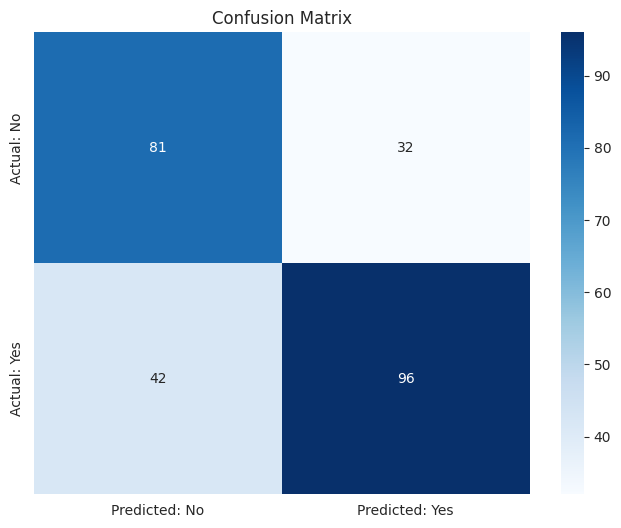


--- Top 10 Most Important Features ---
                    feature  importance
4            family_history    1.551730
22          obs_consequence    0.774170
17                coworkers    0.723984
10             care_options    0.458792
9                  benefits    0.397556
19  mental_health_interview    0.235540
5            work_interfere    0.193707
20    phys_health_interview    0.143866
21       mental_vs_physical    0.081233
13                anonymity    0.079750


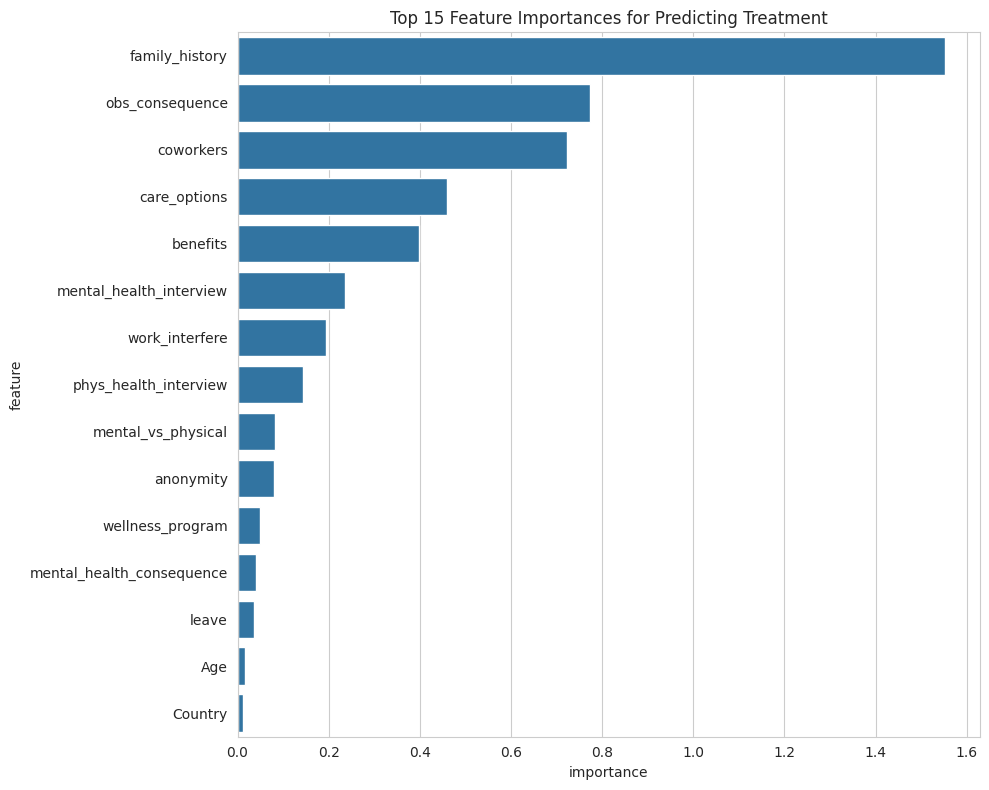

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Loading the Cleaned Data ---
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_survey.csv')
    print("Successfully loaded cleaned_survey.csv")
except FileNotFoundError:
    print("Error: 'cleaned_survey.csv' not found. Please run the data cleaning script first.")
    df = pd.DataFrame()

if not df.empty:
    # --- 2. Preparing Data for Modeling ---

    # Defining the features (X) and the target (y)
    # X contains all columns except our target variable 'treatment'
    X = df.drop('treatment', axis=1)
    # y is the 'treatment' column, which we want to predict
    y = df['treatment']

    # Spliting the data into training and testing sets
    # 80% of the data will be used for training, 20% for testing
    # random_state ensures that the splits are the same every time we run the code
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nData split into training and testing sets:")
    print(f"Training set size: {X_train.shape[0]} rows")
    print(f"Testing set size: {X_test.shape[0]} rows")


    # --- 3. Training the Logistic Regression Model ---

    # Initializing the model
    model = LogisticRegression(max_iter=1000) # max_iter increased for convergence

    # Training the model on the training data
    print("\nTraining the Logistic Regression model...")
    model.fit(X_train, y_train)
    print("Model training complete.")


    # --- 4. Evaluation of the Model ---

    # Making predictions on the test data
    y_pred = model.predict(X_test)

    # Calculating and printing the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2f}")

    # Printing the classification report for more detailed metrics
    print("\n--- Classification Report ---")
    # This shows precision, recall, and f1-score for each class (0: No, 1: Yes)
    print(classification_report(y_test, y_pred, target_names=['Did not seek treatment', 'Sought treatment']))

    # Displaying the confusion matrix
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted: No', 'Predicted: Yes'],
                yticklabels=['Actual: No', 'Actual: Yes'])
    plt.title('Confusion Matrix')
    plt.show()


    # --- 5. Feature Importance ---

    # Trying to get the coefficients from the model
    # In a logistic regression model, the magnitude of the coefficient indicates its importance
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_[0]})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    print("\n--- Top 10 Most Important Features ---")
    print(feature_importance.head(10))

    # Visualizing feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Feature Importances for Predicting Treatment')
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import kagglehub
import os

# A function to check if the script is running in Google Colab
def is_in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# --- 1. Loading the Raw Data from Kaggle Hub ---
print("Downloading dataset from Kaggle Hub...")
try:
    path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")
    csv_path = os.path.join(path, "survey.csv")
    df = pd.read_csv(csv_path)
    print(f"Successfully loaded dataset from: {csv_path}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    df = pd.DataFrame()

if not df.empty:
    # --- 2. Recreating the Same Data Filtering as Before ---
    df = df.drop(['comments', 'state', 'Timestamp'], axis=1)
    df = df[(df['Age'] > 17) & (df['Age'] < 76)]
    # We don't need to clean other columns, just filter the rows exactly as before.

    # --- 3. Generating the Mapping ---
    le = LabelEncoder()
    # Fitting the encoder on the country column to learn the mapping
    country_encoded = le.fit_transform(df['Country'])

    # Creating a new DataFrame with the original names and the encoded numbers
    # The le.classes_ attribute holds the names in the correct order
    country_mapping_df = pd.DataFrame({
        'Country_ID': range(len(le.classes_)),
        'Country_Name': le.classes_
    })

    # --- 4. Saving and Downloading the Mapping File ---
    mapping_file_name = 'country_mapping.csv'
    try:
        country_mapping_df.to_csv(mapping_file_name, index=False)
        print(f"\nSuccessfully created '{mapping_file_name}'.")

        if is_in_colab():
            from google.colab import files
            print(f"Preparing '{mapping_file_name}' for download...")
            files.download(mapping_file_name)
        else:
            print(f"\nFind '{mapping_file_name}' in your local directory.")

    except Exception as e:
        print(f"\nAn error occurred: {e}")


100%|██████████| 48.8k/48.8k [00:00<00:00, 47.2MB/s]

Extracting files...
Successfully loaded dataset from: /root/.cache/kagglehub/datasets/osmi/mental-health-in-tech-survey/versions/3/survey.csv

Successfully created 'country_mapping.csv'.
Preparing 'country_mapping.csv' for download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>